In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

# Rede Neural Convolucional - Autoencoder

In [2]:
# Importando bade de dados
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [3]:
# Convertendo e normalizando dados
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
# Realisando redimencinamento 
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), 28, 28, 1))
previsores_teste = previsores_teste.reshape((len(previsores_teste), 28, 28, 1))

In [5]:
# Criando estrutura da rede neural
autoencoder = Sequential()
# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size = (2, 2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
# 4, 4, 8
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = (2, 2)))
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))
# Decoder
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2, 2)))
autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2, 2)))
autoencoder.add(Conv2D(filters = 1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same'))
# Compilando rede neural
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Treinamento e teste do modelo
autoencoder.fit(previsores_treinamento, previsores_treinamento, epochs = 10, batch_size = 256, validation_data = (previsores_teste, previsores_teste))

Epoch 1/10
235/235 [==============================] - 45s 185ms/step - loss: 0.2455 - accuracy: 0.7964 - val_loss: 0.1625 - val_accuracy: 0.7965
Epoch 2/10
235/235 [==============================] - 40s 171ms/step - loss: 0.1482 - accuracy: 0.8012 - val_loss: 0.1363 - val_accuracy: 0.8052
Epoch 3/10
235/235 [==============================] - 40s 172ms/step - loss: 0.1314 - accuracy: 0.8060 - val_loss: 0.1252 - val_accuracy: 0.8071
Epoch 4/10
235/235 [==============================] - 42s 176ms/step - loss: 0.1231 - accuracy: 0.8080 - val_loss: 0.1202 - val_accuracy: 0.8058
Epoch 5/10
235/235 [==============================] - 40s 169ms/step - loss: 0.1178 - accuracy: 0.8090 - val_loss: 0.1154 - val_accuracy: 0.8097
Epoch 6/10
235/235 [==============================] - 39s 166ms/step - loss: 0.1141 - accuracy: 0.8098 - val_loss: 0.1116 - val_accuracy: 0.8086
Epoch 7/10
235/235 [==============================] - 39s 167ms/step - loss: 0.1113 - accuracy: 0.8103 - val_loss: 0.1087 - val_ac

In [6]:
# Resumo do modelo criado autoencoder
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [8]:
# Encoder baseado no modelo autoencoder
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [9]:
# Testando enconder e decoder
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

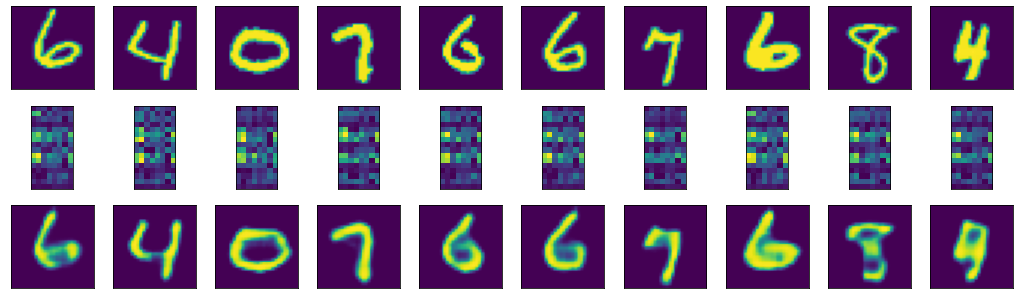

In [10]:
# Visualizando resultados
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)

plt.figure(figsize = (18, 18))

for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10, 10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10, 10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10, 10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())